In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",skiprows=1,header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
col_labels = ["age", "workclass","fnlwgt", "education",
"education_num","marital_status", "occupation","relationship", "race", "sex", "capital_gain","capital_loss","hours_per_week","native_country","wage_class"]

In [6]:
df.columns = col_labels

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
test_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test" , skiprows = 1, header = None)

In [9]:
test_set.columns= col_labels

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [11]:
df['wage_class'].value_counts()

 <=50K    24719
 >50K      7841
Name: wage_class, dtype: int64

In [19]:
l = {" <=50K":0," >50K":1}

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  wage_class      32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
df['wage_class']=df['wage_class'].map(l)

In [23]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


<AxesSubplot:xlabel='education'>

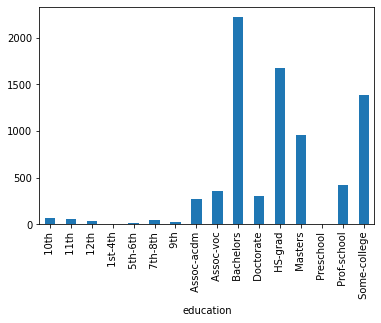

In [24]:
df.groupby(['education'])['wage_class'].sum().plot(kind='bar')

<AxesSubplot:xlabel='fnlwgt', ylabel='wage_class'>

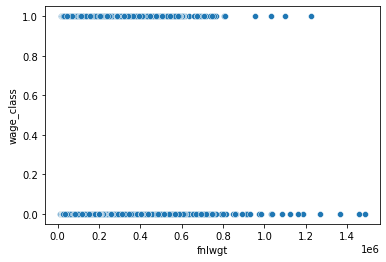

In [26]:
sns.scatterplot(x=df['fnlwgt'],y=df['wage_class'])

In [27]:
df.corrwith(df['wage_class'])

age               0.234039
fnlwgt           -0.009481
education_num     0.335182
capital_gain      0.223333
capital_loss      0.150523
hours_per_week    0.229690
wage_class        1.000000
dtype: float64

In [28]:
cat_fea = []
num_fea = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat_fea.append(i)
    else:
        num_fea.append(i)

In [29]:
cat_fea

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [30]:
num_fea

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'wage_class']

In [31]:
disc_fea =[]
con_fea = []
for i in num_fea:
    if len(df[i].unique())<=25:
        disc_fea.append(i)
    else:
        con_fea.append(i)

In [32]:
disc_fea

['education_num', 'wage_class']

In [33]:
con_fea

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [34]:
for i in cat_fea:
    print('{} have these no of unique value : {}'.format(i,len(df[i].unique())))

workclass have these no of unique value : 9
education have these no of unique value : 16
marital_status have these no of unique value : 7
occupation have these no of unique value : 15
relationship have these no of unique value : 6
race have these no of unique value : 5
sex have these no of unique value : 2
native_country have these no of unique value : 42


In [35]:
for i in cat_fea:
    print('{} have these unique value : {}'.format(i,df[i].unique()))

workclass have these unique value : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education have these unique value : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status have these unique value : [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation have these unique value : [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relationship have these unique value : [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race have these unique value : ['

In [36]:
df['native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [47]:
k =[]
for i in df['native_country']:
    if i == 'other':
        i = i.replace('other',' other')
        k.append(i)
    else:
        k.append(i)

In [48]:
df['native_country'] = k

In [49]:
df['native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 other                           583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [50]:
!pip install category_encoders

In [51]:
import category_encoders as ce

In [52]:
ce_OHE = ce.OneHotEncoder(cols=['native_country'])

In [53]:
data1 = ce_OHE.fit_transform(df)

In [54]:
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Label encoder takes no arguments
le_class = le.fit_transform(df[["native_country"]])

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
Encoded_Mean_Dict = df.groupby(['native_country'])['wage_class'].mean().to_dict()

In [68]:
Encoded_Mean_Dict

{' Cambodia': 0.3684210526315789,
 ' Canada': 0.32231404958677684,
 ' China': 0.26666666666666666,
 ' Columbia': 0.03389830508474576,
 ' Cuba': 0.2631578947368421,
 ' Dominican-Republic': 0.02857142857142857,
 ' Ecuador': 0.14285714285714285,
 ' El-Salvador': 0.08490566037735849,
 ' England': 0.3333333333333333,
 ' France': 0.41379310344827586,
 ' Germany': 0.32116788321167883,
 ' Greece': 0.27586206896551724,
 ' Guatemala': 0.046875,
 ' Haiti': 0.09090909090909091,
 ' Holand-Netherlands': 0.0,
 ' Honduras': 0.07692307692307693,
 ' Hong': 0.3,
 ' Hungary': 0.23076923076923078,
 ' India': 0.4,
 ' Iran': 0.4186046511627907,
 ' Ireland': 0.20833333333333334,
 ' Italy': 0.3424657534246575,
 ' Jamaica': 0.12345679012345678,
 ' Japan': 0.3870967741935484,
 ' Laos': 0.1111111111111111,
 ' Mexico': 0.05132192846034215,
 ' Nicaragua': 0.058823529411764705,
 ' Outlying-US(Guam-USVI-etc)': 0.0,
 ' Peru': 0.06451612903225806,
 ' Philippines': 0.30808080808080807,
 ' Poland': 0.2,
 ' Portugal': 0.1

In [69]:
df['native_country_mean'] = df['native_country'].map(Encoded_Mean_Dict)

In [70]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,native_country_mean
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.245843
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.245843
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.245843
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.263158
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0.245843


In [73]:
nam = df['relationship'].value_counts().index

In [74]:
val = df['relationship'].value_counts().values

In [117]:
d = {}
count = 0
for i in nam:
    d[i] = val[count]/100
    count = count + 1

In [88]:
count

6

In [89]:
d

{' Husband': 131.93,
 ' Not-in-family': 83.04,
 ' Own-child': 50.68,
 ' Unmarried': 34.46,
 ' Wife': 15.68,
 ' Other-relative': 9.81}

In [90]:
df['relationship'] = df['relationship'].map(d)

In [93]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,131.93,White,Male,0,0,13,0,0.245843
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,83.04,White,Male,0,0,40,0,0.245843


In [92]:
df.drop('native_country',axis=1,inplace=True)

In [94]:
df['race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [95]:
nam = df['race'].value_counts().index
val = df['race'].value_counts().values

In [97]:
d

{' White': 278.15,
 ' Black': 31.24,
 ' Asian-Pac-Islander': 10.39,
 ' Amer-Indian-Eskimo': 3.11,
 ' Other': 2.71}

In [98]:
df['race'] = df['race'].map(d)

In [99]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,131.93,278.15,Male,0,0,13,0,0.245843
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,83.04,278.15,Male,0,0,40,0,0.245843


In [100]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [101]:
l ={' Male':1,' Female':0}
df['sex'] = df['sex'].map(l)

In [102]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,131.93,278.15,1,0,0,13,0,0.245843
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,83.04,278.15,1,0,0,40,0,0.245843


In [103]:
df[df['workclass'] == ' Without-pay']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
1900,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,34.46,278.15,0,0,0,50,0,0.245843
9256,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,50.68,278.15,1,0,0,20,0,0.245843
15532,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,50.68,31.24,1,0,0,40,0,0.245843
15694,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,50.68,278.15,1,4416,0,40,0,0.245843
16811,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,15.68,278.15,0,0,0,25,0,0.245843
20072,65,Without-pay,172949,HS-grad,9,Married-civ-spouse,Transport-moving,131.93,278.15,1,2414,0,20,0,0.245843
21943,52,Without-pay,198262,HS-grad,9,Married-civ-spouse,Adm-clerical,15.68,278.15,0,0,0,30,0,0.245843
22214,19,Without-pay,43887,HS-grad,9,Never-married,Farming-fishing,50.68,278.15,1,0,0,10,0,0.245843
24595,62,Without-pay,170114,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,131.93,278.15,1,0,0,50,0,0.245843
25499,29,Without-pay,212588,Some-college,10,Married-civ-spouse,Farming-fishing,50.68,278.15,1,0,0,65,0,0.245843


In [104]:
df[df['workclass'] == ' Self-emp-not-inc']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,131.93,278.15,1,0,0,13,0,0.245843
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,131.93,278.15,1,0,0,45,1,0.245843
15,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,50.68,278.15,1,0,0,35,0,0.245843
18,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,34.46,278.15,0,0,0,45,1,0.245843
38,48,Self-emp-not-inc,265477,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,131.93,278.15,1,0,0,40,0,0.245843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32455,30,Self-emp-not-inc,261943,11th,7,Married-spouse-absent,Craft-repair,83.04,278.15,1,0,0,30,0,0.076923
32467,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,83.04,278.15,1,0,0,65,0,0.245843
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,50.68,278.15,1,0,0,50,0,0.250429
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,83.04,278.15,1,1086,0,60,0,0.245843


In [105]:
df[df['workclass'] == ' Never-worked']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
5360,18,Never-worked,206359,10th,6,Never-married,?,50.68,278.15,1,0,0,40,0,0.245843
10844,23,Never-worked,188535,7th-8th,4,Divorced,?,83.04,278.15,1,0,0,35,0,0.245843
14771,17,Never-worked,237272,10th,6,Never-married,?,50.68,278.15,1,0,0,30,0,0.245843
20336,18,Never-worked,157131,11th,7,Never-married,?,50.68,278.15,0,0,0,10,0,0.245843
23231,20,Never-worked,462294,Some-college,10,Never-married,?,50.68,31.24,1,0,0,40,0,0.245843
32303,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,15.68,31.24,0,0,0,40,0,0.245843
32313,18,Never-worked,153663,Some-college,10,Never-married,?,50.68,278.15,1,0,0,4,0,0.245843


In [107]:
s = df[df['workclass'] == ' ?']

In [108]:
s['wage_class'].value_counts()

0    1645
1     191
Name: wage_class, dtype: int64

In [109]:
s

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
26,54,?,180211,Some-college,10,Married-civ-spouse,?,131.93,10.39,1,0,0,60,1,0.200000
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,83.04,278.15,1,0,0,40,0,0.250429
68,25,?,200681,Some-college,10,Never-married,?,50.68,278.15,1,0,0,40,0,0.245843
76,67,?,212759,10th,6,Married-civ-spouse,?,131.93,278.15,1,0,0,2,0,0.245843
105,17,?,304873,10th,6,Never-married,?,50.68,278.15,0,34095,0,32,0,0.245843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,15.68,278.15,0,0,0,55,1,0.245843
32530,30,?,33811,Bachelors,13,Never-married,?,83.04,10.39,0,0,0,99,0,0.245843
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,131.93,278.15,1,0,0,10,1,0.245843
32540,41,?,202822,HS-grad,9,Separated,?,83.04,31.24,0,0,0,32,0,0.245843


In [110]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,131.93,278.15,1,0,0,13,0,0.245843
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,83.04,278.15,1,0,0,40,0,0.245843
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,131.93,31.24,1,0,0,40,0,0.245843
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,15.68,31.24,0,0,0,40,0,0.263158
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,15.68,278.15,0,0,0,40,0,0.245843


In [111]:
df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [112]:
df[df['workclass'] == ' Federal-gov']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
21,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,131.93,31.24,1,0,0,40,0,0.245843
32,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,50.68,278.15,1,0,0,40,0,0.245843
44,57,Federal-gov,337895,Bachelors,13,Married-civ-spouse,Prof-specialty,131.93,31.24,1,0,0,40,1,0.245843
52,50,Federal-gov,251585,Bachelors,13,Divorced,Exec-managerial,83.04,278.15,1,0,0,55,1,0.245843
88,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,83.04,278.15,0,0,0,50,1,0.245843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32382,28,Federal-gov,381789,Bachelors,13,Never-married,Prof-specialty,83.04,278.15,1,0,0,50,0,0.245843
32385,59,Federal-gov,23789,HS-grad,9,Married-civ-spouse,Sales,15.68,278.15,0,0,0,40,1,0.245843
32427,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,15.68,10.39,0,0,0,40,0,0.308081
32472,41,Federal-gov,160467,Masters,14,Divorced,Prof-specialty,34.46,278.15,0,1506,0,40,0,0.245843


In [132]:
df.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
age,1.000000,-0.063972,-0.076646,-0.007477,0.036527,-0.017008,0.302071,0.034071,0.088832,0.077674,0.057775,0.068756,0.234039,0.054978
workclass,-0.063972,1.000000,0.013502,0.099760,0.110172,-0.004444,0.011969,-0.033703,-0.009434,-0.017029,0.006886,0.083059,0.063474,-0.000335
fnlwgt,-0.076646,0.013502,1.000000,-0.037169,-0.043159,-0.007162,-0.019425,-0.051172,0.026882,0.000437,-0.010259,-0.018770,-0.009481,-0.117966
education,-0.007477,0.099760,-0.037169,1.000000,0.860460,0.069718,0.062870,0.041021,-0.020743,0.071425,0.060818,0.088157,0.270309,0.198758
education_num,0.036527,0.110172,-0.043159,0.860460,1.000000,0.097728,0.109205,0.049299,0.012256,0.122627,0.079932,0.148127,0.335182,0.242732
marital_status,-0.017008,-0.004444,-0.007162,0.069718,0.097728,1.000000,0.551179,0.093834,0.429194,0.060153,0.056704,0.134355,0.328762,0.024787
relationship,0.302071,0.011969,-0.019425,0.062870,0.109205,0.551179,1.000000,0.142770,0.599527,0.071106,0.070497,0.261992,0.328350,0.060402
race,0.034071,-0.033703,-0.051172,0.041021,0.049299,0.093834,0.142770,1.000000,0.100863,0.013789,0.020743,0.048221,0.083809,-0.013544
sex,0.088832,-0.009434,0.026882,-0.020743,0.012256,0.429194,0.599527,0.100863,1.000000,0.048477,0.045572,0.229312,0.215995,0.004124
capital_gain,0.077674,-0.017029,0.000437,0.071425,0.122627,0.060153,0.071106,0.013789,0.048477,1.000000,-0.031614,0.078409,0.223333,0.022961


In [114]:
df['marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [116]:
nam = df['marital_status'].value_counts().index
val = df['marital_status'].value_counts().values

In [118]:
d

{' Married-civ-spouse': 149.76,
 ' Never-married': 106.82,
 ' Divorced': 44.43,
 ' Separated': 10.25,
 ' Widowed': 9.93,
 ' Married-spouse-absent': 4.18,
 ' Married-AF-spouse': 0.23}

In [119]:
df['marital_status'] = df['marital_status'].map(d
                                               )

In [121]:
k =[]
for i in df['workclass']:
    if i == ' ?':
        i = i.replace(' ?',' Unknown')
        k.append(i)
    else:
        k.append(i)

In [122]:
df['workclass'] = k

In [123]:
df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [124]:
d = {' Federal-gov':9, ' State-gov':8,' Local-gov':7, ' Private':6,' Self-emp-inc':5,' Self-emp-not-inc':4,' Without-pay':3,' Never-worked':2,' Unknown':1}

In [125]:
df['workclass'] = df['workclass'].map(d)

In [126]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,native_country_mean
0,50,4,83311,Bachelors,13,149.76,Exec-managerial,131.93,278.15,1,0,0,13,0,0.245843
1,38,6,215646,HS-grad,9,44.43,Handlers-cleaners,83.04,278.15,1,0,0,40,0,0.245843


In [127]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [130]:
d = {' Doctorate':16,
' Masters':15,
' Assoc-acdm':14,
' Assoc-voc':13,
' Bachelors':12,
' Some-college':11,
' Prof-school':10,
' 12th':9,
' 11th':8,
' HS-grad':7,
' 10th':6,
' 9th':5,
' 7th-8th':4,
' 5th-6th':3,
' 1st-4th':2,
' Preschool':1}

In [131]:
df['education']= df['education'].map(d)

In [133]:
df['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [140]:
x = df.drop('wage_class',axis = 1)
x = x.drop('occupation',axis=1)

In [135]:
y = df['wage_class']

In [136]:
from sklearn.feature_selection import SelectFromModel

In [137]:
from sklearn.tree import ExtraTreeClassifier

In [156]:
s = SelectFromModel(ExtraTreeClassifier())
p = s.fit(x,y)

In [157]:
l = list(x.columns[(p.get_support())])

In [158]:
l

['age',
 'fnlwgt',
 'education',
 'relationship',
 'capital_gain',
 'hours_per_week']

In [162]:
df[l].corrwith(df['wage_class'])

age               0.234039
education         0.270309
relationship      0.328350
capital_gain      0.223333
hours_per_week    0.229690
dtype: float64

In [161]:
l.pop(1)

'fnlwgt'

In [163]:
x = x[l]

In [164]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
d = scale.fit_transform(x)

In [165]:
x = pd.DataFrame(d,columns=l)

In [166]:
x.head()

,age,education,relationship,capital_gain,hours_per_week
0,0.837097,0.778606,1.070625,-0.145914,-2.22212
1,-0.042640,-0.884610,-0.100125,-0.145914,-0.03543
2,1.057031,-0.551967,1.070625,-0.145914,-0.03543
3,-0.775755,0.778606,-1.713169,-0.145914,-0.03543
4,-0.115952,1.776535,-1.713169,-0.145914,-0.03543


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [169]:
from xgboost import XGBClassifier

In [170]:
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [194]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [172]:
pred = xg.predict(X_test)

In [173]:
accuracy_score(y_test,pred)

0.8525798525798526

In [174]:
import pickle

In [175]:
pickle.dump(scale,open('process.pkl','wb'))
pickle.dump(xg,open('model.pkl','wb'))

In [196]:
data = {
    'age':52,
    'education':7,
    'relationship':15.68,
    'capital_gain':15024,
    'hours_per_week':40
}

In [177]:
df[l]

,age,education,relationship,capital_gain,hours_per_week
0,50,12,131.93,0,13
1,38,7,83.04,0,40
2,53,8,131.93,0,40
3,28,12,15.68,0,40
4,37,15,15.68,0,40
...,...,...,...,...,...
32555,27,14,15.68,0,38
32556,40,7,131.93,0,40
32557,58,7,34.46,0,40
32558,22,7,50.68,0,20


In [197]:
s = np.array(list(data.values()))

In [198]:
p = s.reshape(1,-1)

In [183]:
pro = pickle.load(open('process.pkl','rb'))
mod = pickle.load(open('model.pkl','rb'))

In [199]:
t = pro.transform(p)

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [200]:
mod.predict(t)[0]

1

In [186]:
l.append('wage_class')

In [187]:
df[l]

,age,education,relationship,capital_gain,hours_per_week,wage_class
0,50,12,131.93,0,13,0
1,38,7,83.04,0,40,0
2,53,8,131.93,0,40,0
3,28,12,15.68,0,40,0
4,37,15,15.68,0,40,0
...,...,...,...,...,...,...
32555,27,14,15.68,0,38,0
32556,40,7,131.93,0,40,1
32557,58,7,34.46,0,40,0
32558,22,7,50.68,0,20,0


In [195]:
confusion_matrix(y_test,pred)

array([[6885,  510],
       [ 930, 1443]], dtype=int64)